# Markov chain monte carlo

In [1]:
import numpy as np
np.random.seed = 123
import matplotlib.pyplot as plt
plt.style.use("science")

## MCMC for a gaussian

$$f(x) = \dfrac{1}{2\pi\sigma^2} \exp(\dfrac{-1}{2\sigma^2} (x - \mu)^2), X \sim N(\mu, \sigma^2)$$
$$f(x) \propto \exp(\dfrac{-1}{2\sigma^2} (x - \mu)^2)$$
Choose $g(x/y) = y + Uniform(-1, 1)$

In [2]:
def f(x:float, mu:float, sigma:float):
    return np.exp((-1./(2*sigma**2)) * (x - mu)**2)

In [3]:
def g(y):
    return y + np.random.uniform(-1., 1.)

In [4]:
def mcmc_step(xt, mu, sigma):
    # Sample x ~ g(x / xt)
    x = g(xt)
    # Compute the acceptance probability
    a = f(x, mu, sigma) / f(xt, mu, sigma)
    # Accept or reject
    u = np.random.uniform()
    if (u <= a) :
        return x
    return xt

In [5]:
def mcmc(xt, mu, sigma, n = 2000, burn = 1000):
    sample = []
    for i in range(burn):
        x = mcmc_step(xt, mu, sigma)
        if (xt != x):
            xt = x

    for i in range(n):
        x = mcmc_step(xt, mu, sigma)
        if (xt != x):
            sample += [x]
            xt = x
    return np.array(sample)

In [6]:
x = mcmc(0., 0., 1.)

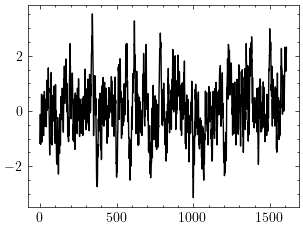

In [7]:
plt.plot(x, color = "black")
plt.show()

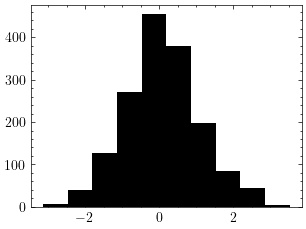

In [8]:
plt.hist(x, color = "black")
plt.show()

## Width

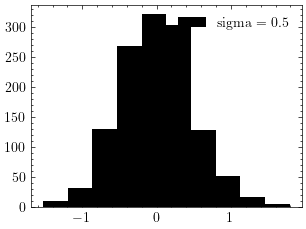

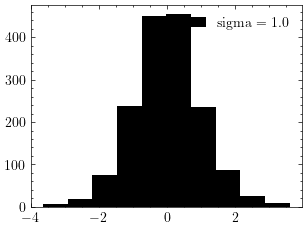

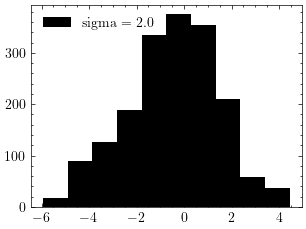

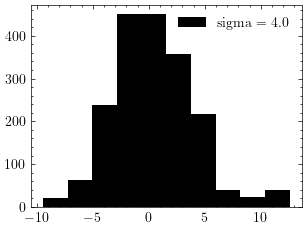

In [9]:
for width in np.array([.5, 1., 2., 4.]):
    x = mcmc(0., 0., width, burn = 0)
    plt.hist(x, color = "black", label = r"sigma = " + str(width))
    plt.legend()
    plt.show()

## Burn-in period

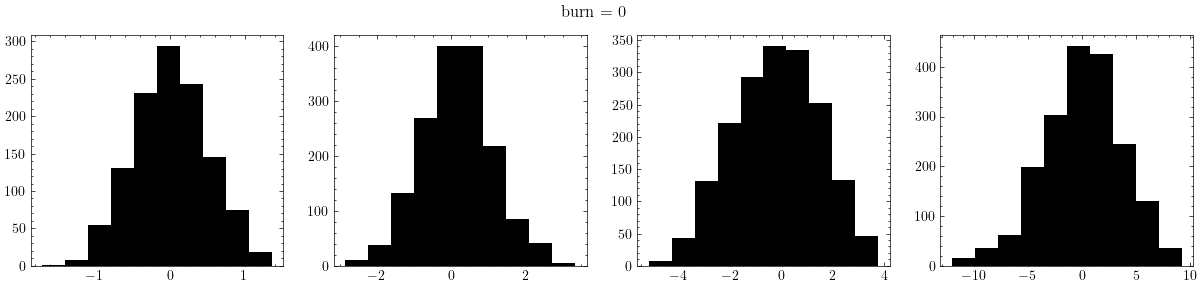

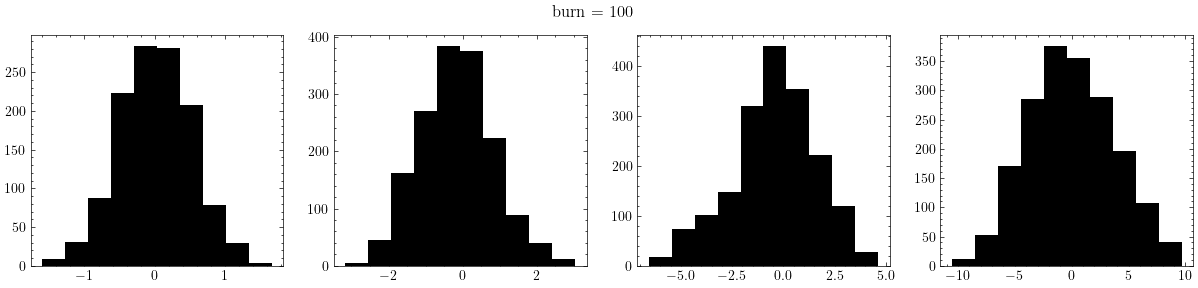

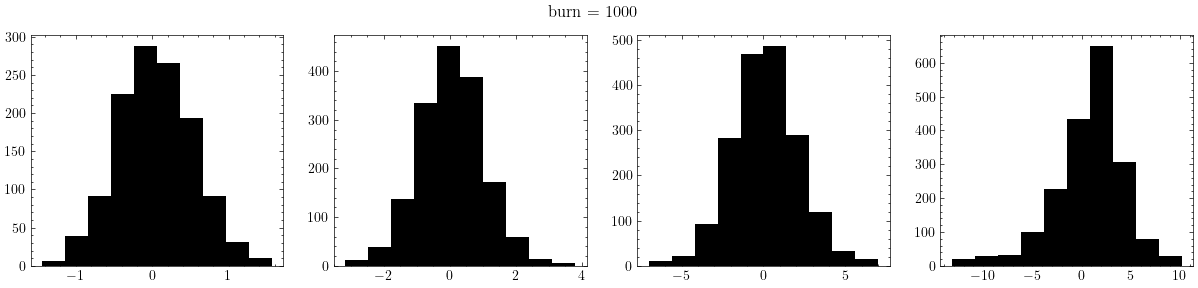

In [10]:
n = 2000
for burn in np.array([0, 100, 1000]):
    fig, axes = plt.subplots(1, 4, figsize = (15, 3))
    x = [mcmc(0., 0., .5, n, burn), mcmc(0., 0., 1., n, burn),
         mcmc(0., 0., 2., n, burn), mcmc(0., 0., 4., n, burn)]
    axes[0].hist(x[0], color = "black", label = r"mu = 1/2")
    axes[1].hist(x[1], color = "black")
    axes[2].hist(x[2], color = "black")
    axes[3].hist(x[3], color = "black")
    fig.suptitle("burn = " + str(burn))
    #plt[0].legend()
    plt.show()